# inferential_stats_ip

this module will do automations for binomial distributions, uniform distributions, and normal distributions. and maybe hypothesis testing, we'll see. (graphing,testing, and getting pvalues everything baby!!! everything!!!)
<br>

1. very good for when you are doing data science stuff in ipynb files
2. i will integrate this so it can be called in other platforms as well but jupyter is good at showing plots and stuff so...

TABLE OF CONTENTS<br>
<br>
Do Things
1. do_binom = do things binomial distribution
2. do_uniform = do things uniform distribution
3. do_normal = do things normal distribution
<br>

Test Things
1. test_kolmosmirnov = use the kolmogorov-smirnov test over an arbirtary uniform/normal distribution

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib as mpl
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions


from scipy.stats import binom #all things binomial distribution
from scipy.stats import uniform #all things uniform distribution
from scipy.stats import norm #all things normal distribution

from sklearn.preprocessing import MinMaxScaler #sklearn library for scaling data

In [2]:
def do_binom(pmfk, pmfn, pmfp, cdfk = None, method=None ):
    '''
    pmfk is the number of possible outcomes of success
    pmfn is the sample number / number of trials
    pmfp is the probability of success
    cdfk is the cumulative density function i.e. what frequency of success are you interested in looking
    method should be lesseq, greater (we are talking distinct data here)
    '''
    plt.figure(figsize=(15,4))
    
    knum = np.arange(0, pmfk+1)
    print("PROBABILITY MASS FUNCTION: BINOMIAL DISTRIBUTION")
    pmf_binomial = binom.pmf(knum, pmfn,pmfp)
    bar1 = plt.bar(knum, pmf_binomial)
    plt.title(f"Binomial: n = {pmfn}, p={pmfp}")
    plt.xlabel("Number of Successes")
    plt.ylabel("Probability of Successes")
    bar1[pmf_binomial.argmax()].set_color("r")
    plt.show()
    print("Probability Mass Function:")
    for num, binomial in enumerate(pmf_binomial):
        print(f"{num} successes: {round(binomial,5)}")
    print("\n")        
    
    if cdfk is not None and method is not None:
        if  method not in ['lesseq','greater']:
            raise Exception("sorry only parameters: lesseq or greater are allowed")
        else:
            print("CUMULATIVE DENSITY FUNCTION: BINOMIAL DISTRIBUTION")
            cdf_binomial = binom.cdf(cdfk, pmfn, pmfp) if method == 'lesseq' else 1 - binom.cdf(cdfk, pmfn, pmfp)
            oper = "<=" if method == 'lesseq' else ">"
            plt.figure(figsize=(15,4))
            bar2 = plt.bar(knum, pmf_binomial)
            plt.title(f"Binomial Cumulative: n = {pmfn}, p={pmfp}")
            plt.xlabel("Number of Successes")
            plt.ylabel("Probability of Successes")
            intrange = np.arange(knum.min(), cdfk + 1) if method == 'lesseq' else np.arange(cdfk + 1, knum.max() + 1)
            for i in intrange:
                bar2[i].set_color("r")
            plt.show()



            print("Cumulative Density Function (Binomial Distribution)")
            print(f"P(X{oper}{cdfk}) = {round(cdf_binomial, 5)}")    



PROBABILITY MASS FUNCTION: BINOMIAL DISTRIBUTION


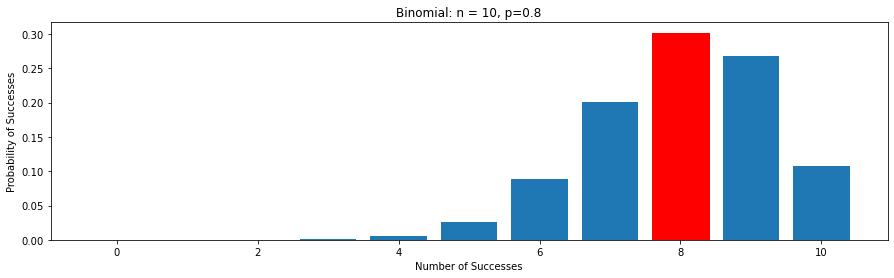

Probability Mass Function:
0 successes: 0.0
1 successes: 0.0
2 successes: 7e-05
3 successes: 0.00079
4 successes: 0.00551
5 successes: 0.02642
6 successes: 0.08808
7 successes: 0.20133
8 successes: 0.30199
9 successes: 0.26844
10 successes: 0.10737


CUMULATIVE DENSITY FUNCTION: BINOMIAL DISTRIBUTION


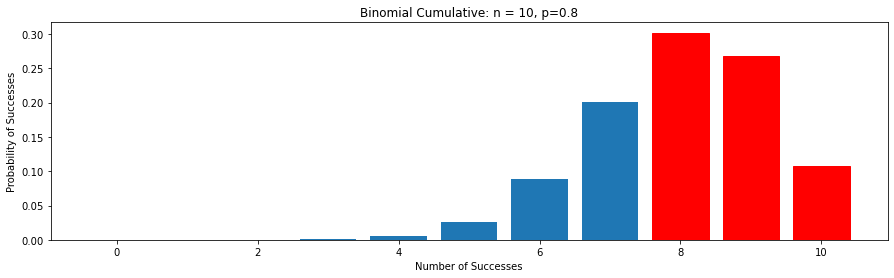

Cumulative Density Function (Binomial Distribution)
P(X>7) = 0.6778


In [3]:
do_binom(10, 10, 0.8, 7, "greater") #example of an output

## 

In [7]:
def do_uniform(data, xcdf, method, kstol = 0.10):
    '''
    data is the series/array to be inputted ok?
    xcdf is the value interested in for cumulative density function
    method is lesseq or greater
    kstol is the alpha of the kolmogorov smirnov to test for uniformity of the data. if < kstol, sorry dude check your dist
    '''
    
    #test if the distribtion is normal first
    ks = test_kolmosmirnov(data, kstol = kstol, distshape = 'uniform')
    
    if ks:
        print("Uniform Probability Distribution")
        x = np.linspace(data.min(), data.max(), 50)
        uniform_pdf = uniform.pdf(x, loc=data.min(), scale = data.max())
        
        if method not in ['lesseq','greater']:
            raise Exception("sorry only parameters: lesseq or greater are allowed")
        else:
            #prepare the graphing for cumulative uniform distribution
            x1 = np.linspace(data.min(), xcdf, 20) if method == 'lesseq' else np.linspace(xcdf, data.max(), 20)
            plt.plot(x, uniform_pdf)
            plt.fill_between(x, uniform_pdf)
            plt.fill_between(x1, uniform.pdf(x=x1, loc=data.min(), scale=data.max()), color="r")
            plt.xlabel("Data Array")
            plt.ylabel("Probability")
            plt.title(f"Continuous Uniform Distribution: X ~ U({int(data.min())},{int(data.max())})")
            plt.show() 
            
            #analyze and show numbers
            uniform_cdf = uniform.cdf(x=xcdf, loc=data.min(), scale=data.max()) if method == "lesseq" else 1 - uniform.cdf(x=xcdf, loc=data.min(), scale=data.max())
            oper = "<=" if method == 'lesseq' else ">"
            print("Cumulative Density Function: Uniform Distribution")
            print(f"P(X{oper}{xcdf}) = {round(uniform_cdf, 5)}")  

Kolmogorov Smirnov Test for Distribution: uniform
dataset scaled for uniform


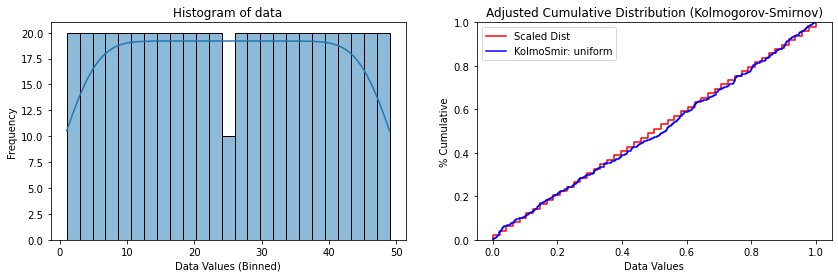

k-s stat: 0.02040816326530612
k-s p-value: 0.9843669417111557
distribution evident to be uniform



Uniform Probability Distribution


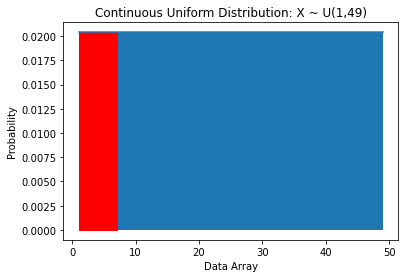

Cumulative Density Function: Uniform Distribution
P(X<=7) = 0.12245


In [8]:
#example of output using do_uniform() function
list1 = [[n] * 10 for n in range(1,50)]
list2 = [n for block in list1 for n in block]
array1 = np.array(list2)

do_uniform(array1, 7, 'lesseq')

In [9]:
def do_normal(data, xcdf, method, kstol = 0.10):
    '''
    data is the input data as a series or array
    xcdf is the value interested for cumulative distribution. NOTE THIS SHOULD BE A LIST!
    method is less, greater, between, lessandgreater
    kstol is the alpha of the kolmogorov smirnov to test for uniformity of the data. if < kstol, sorry dude 
    '''
    #just test for the xcdf
    try:
        len(xcdf) == 1 and method not in ['less','greater'] or len(xcdf) == 2 and method not in ['between','lessandgreater']
    except:
        raise Exception("list of xcdf shall match the method i.e. between shall have 2 numbers in the list")
    
    #test if distribution is normal first
    ks = test_kolmosmirnov(data, kstol = kstol, distshape = 'norm')
    
    if ks:
        print("Normal Probability Distribution")
        #prepare the probability distribution 
        density = pd.DataFrame()
        density['x'] = np.linspace(data.min(), data.max(), 100)
        density['pdf'] = norm.pdf(density['x'], data.mean(), data.std())
        
        #get your canvas on! 
        plt.plot(density['x'], density['pdf'])
        plt.axvline(x= xcdf[0], c='r')
        x1 = np.linspace(density['x'].min(), xcdf[0], 100)
        if method in ['between','lessandgreater']:
            plt.axvline(x=xcdf[1], c='r')
    
        #calculate the cdf for all cases
        if method == 'less':
            p = norm.cdf(xcdf[0], data.mean(), data.std())
            x1 = np.linspace(density['x'].min(), xcdf[0], 100)
            oper = 'X < ' + str(xcdf[0])
        elif method == 'greater':
            p = 1 - norm.cdf(xcdf[0], data.mean(), data.std())
            x1 = np.linspace(xcdf[0], density['x'].max(), 100)
            oper = 'X > ' + str(xcdf[0])
        elif method == 'between':
            xcdf_sort = sorted(xcdf)
            p =  norm.cdf(xcdf_sort[1], data.mean(), data.std()) - norm.cdf(xcdf_sort[0], data.mean(), data.std())
            x1 = np.linspace(xcdf[0], xcdf[1], 100)
            oper = str(xcdf[0]) + " < X < " + str(xcdf[1])
        else:
            xcdf_sort = sorted(xcdf)
            p = norm.cdf(xcdf_sort[0], data.mean(), data.std()) + (1 - norm.cdf(xcdf_sort[1], data.mean(), data.std()))
            x1 = np.linspace(density['x'].min(), xcdf[0], 100)
            x2 = np.linspace(xcdf[1], density['x'].max(), 100)
            oper = str(xcdf[0]) + " < X > " + str(xcdf[1])
    
        #show results
        plt.fill_between(x1, norm.pdf(x1, data.mean(), data.std()), color = 'r')
        if method == 'lessandgreater':
            plt.fill_between(x2, norm.pdf(x2, data.mean(), data.std()), color = 'r') 
        plt.xlabel("Data Array")
        plt.ylabel("Probability")
        plt.title("Normal Distribution")
        plt.show() 
        print(f"P({oper} = {round(p,5)})")

Kolmogorov Smirnov Test for Distribution: norm
dataset normalized for norm


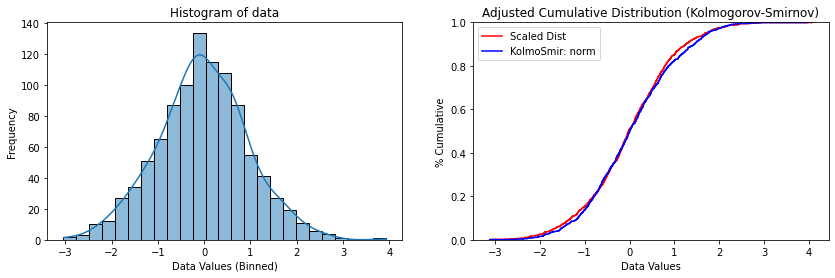

k-s stat: 0.023713187614867348
k-s p-value: 0.6186291081296489
distribution evident to be norm



Normal Probability Distribution


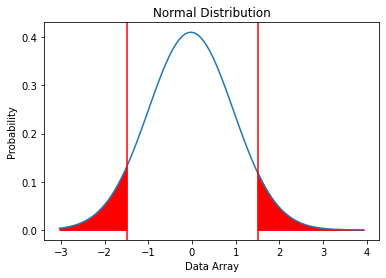

P(-1.5 < X > 1.5 = 0.12286)


In [10]:
#example of running the do_normal function
x = np.random.randn(1000)
do_normal(x, [-1.5,1.5], method='lessandgreater')

In [11]:
def test_kolmosmirnov(data, kstol, distshape='norm'):
    '''
    data is the input data for testing of kolmogorov-smirnov
    kstol is the alpha value for testing
    distshape is the shape of the data you are testing to assume: norm, uniform
    '''
    
    if distshape not in ['norm', 'uniform']:
        raise Exception("sorry! only norm or uniform to undergo distribution testing")
    else:
        #intro: scale the data so it can be matched to a standard distribution
        print(f"Kolmogorov Smirnov Test for Distribution: {distshape}")
        #set up the data
        df = pd.DataFrame(data)
        
        if distshape == 'norm': #normalize data if testing for normal dist
            df['scaled'] = (df[df.columns[0]] -  df[df.columns[0]].mean()) /  df[df.columns[0]].std()
            scaled = df['scaled'].to_list()
            print('dataset normalized for norm')
        else: #scale minmax to if testing for uniform
            minmaxscaler = MinMaxScaler() 
            df['scaled'] = minmaxscaler.fit_transform(df)
            print('dataset scaled for uniform')
        
        test_stat, p_value = stats.kstest(df['scaled'], distshape)
        rgraph = np.random.normal(0,1, len(df['scaled'])) if distshape == 'norm' else uniform.rvs(loc=0, scale=1, size=len(df['scaled']), random_state=1)
        
        #set up plots
        fig, ax = plt.subplots(1,2, figsize = (14,4))
        sns.histplot(df[df.columns[0]], kde=True, bins = 25, ax=ax[0])
        ax[0].set_title("Histogram of data")
        ax[0].set_xlabel("Data Values (Binned)")
        ax[0].set_ylabel("Frequency")
        sns.ecdfplot(df['scaled'], ax=ax[1], color ='red', label='Scaled Dist')
        sns.ecdfplot(rgraph, ax=ax[1],color='blue', label=f'KolmoSmir: {distshape}')
        ax[1].set_title("Adjusted Cumulative Distribution (Kolmogorov-Smirnov)")
        ax[1].set_xlabel("Data Values")
        ax[1].set_ylabel("% Cumulative")
        leg = ax[1].legend()
        for text in leg.get_texts():
            text.set_color('black')
        plt.show()

        #print output results
        print(f"k-s stat: {test_stat}")
        print(f"k-s p-value: {p_value}")
        print(f"this is not a {distshape} distribution!" if p_value < kstol else f"distribution evident to be {distshape}")
        print('\n\n')
        #return pass or fail
        return p_value > kstol

Kolmogorov Smirnov Test for Distribution: norm
dataset normalized for norm


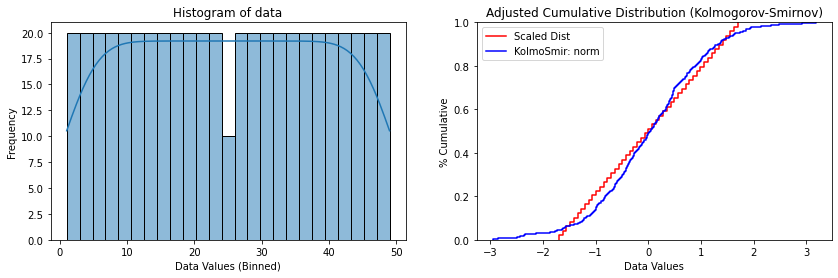

k-s stat: 0.06714179231244999
k-s p-value: 0.023007044404444142
this is not a norm distribution!





False

In [12]:
#example of output kolmogorov smirnov function. i intended to create a uniform distribution to be tested against normal dist.
list1 = [[n] * 10 for n in range(1,50)]
list2 = [n for block in list1 for n in block]
array1 = np.array(list2)

test_kolmosmirnov(array1, 0.10, distshape = 'norm')

Kolmogorov Smirnov Test for Distribution: uniform
dataset scaled for uniform


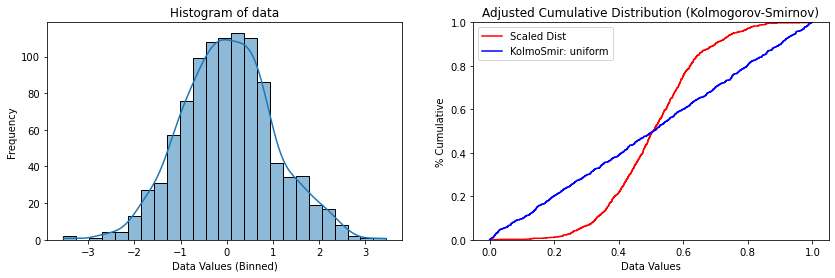

k-s stat: 0.24052709270849276
k-s p-value: 2.1093024634464888e-51
this is not a uniform distribution!





False

In [13]:
x = np.random.randn(1000)
df = pd.DataFrame(x)
minmaxscale = MinMaxScaler()
x_scaled = minmaxscale.fit_transform(df)
test_kolmosmirnov(x, 0.10, 'uniform')